In [78]:
#IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,root_mean_squared_error

In [79]:
df = pd.read_excel('/content/Ocean_Plastic_Pollution_data.xlsx')

In [80]:
df

,Unnamed: 0,Country,Region,Plastic_Type,Latitude,Longitude,Plastic_Weight_kg,Pollution_Level,Date,Year,Depth_meters,data_source,Waste_Management_Efficiency,Nearby_Population
0,0,Greenland,Arctic Ocean,Polyethylene Terephthalate (PET),-58.459627,-169.626456,41.930000,Low,01/01/2015,2023,73.090000,NGO,0.909422,13914
1,1,Chile,Southern Ocean,Polyethylene (PE),49.449892,77.319852,403.380000,High,01/01/2015,2020,71.210000,Satellite,0.094392,492
2,2,Madagascar,Indian Ocean,Polyethylene Terephthalate (PET),80.422411,130.332581,241.700000,Moderate,01/01/2015,2024,19.530000,Government,0.544576,6927
3,3,Argentina,Southern Ocean,Polyethylene Terephthalate (PET),-71.920725,58.003563,482.760000,High,01/01/2015,2021,69.720000,Research,0.052429,1230
4,4,South Africa,Southern Ocean,Polyethylene Terephthalate (PET),-61.993742,-169.011282,58.750000,Low,01/01/2015,2023,58.140000,NGO,0.956200,26329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114995,114995,China,Pacific Ocean,Polyethylene (PE),66.253502,-20.133950,282.639472,Moderate,05/05/2016,2022,89.700783,Satellite,0.361415,1728
114996,114996,Canada,Arctic Ocean,Polystyrene (PS),-32.763941,-36.604010,117.551438,Moderate,13/04/2015,2022,18.123190,NGO,0.830864,7436
114997,114997,Greenland,Arctic Ocean,Polypropylene (PP),43.896948,87.305068,392.975691,High,05/06/2015,2021,11.447356,NGO,0.222096,615
114998,114998,Mexico,Pacific Ocean,Polyethylene Terephthalate (PET),-83.953034,115.157297,27.998384,Low,13/05/2016,2024,79.650850,NGO,0.977487,1096


DATA INSPECTION


In [81]:
df.head()

,Unnamed: 0,Country,Region,Plastic_Type,Latitude,Longitude,Plastic_Weight_kg,Pollution_Level,Date,Year,Depth_meters,data_source,Waste_Management_Efficiency,Nearby_Population
0,0,Greenland,Arctic Ocean,Polyethylene Terephthalate (PET),-58.459627,-169.626456,41.93,Low,01/01/2015,2023,73.09,NGO,0.909422,13914
1,1,Chile,Southern Ocean,Polyethylene (PE),49.449892,77.319852,403.38,High,01/01/2015,2020,71.21,Satellite,0.094392,492
2,2,Madagascar,Indian Ocean,Polyethylene Terephthalate (PET),80.422411,130.332581,241.70,Moderate,01/01/2015,2024,19.53,Government,0.544576,6927
3,3,Argentina,Southern Ocean,Polyethylene Terephthalate (PET),-71.920725,58.003563,482.76,High,01/01/2015,2021,69.72,Research,0.052429,1230
4,4,South Africa,Southern Ocean,Polyethylene Terephthalate (PET),-61.993742,-169.011282,58.75,Low,01/01/2015,2023,58.14,NGO,0.956200,26329


In [82]:
df.tail()

,Unnamed: 0,Country,Region,Plastic_Type,Latitude,Longitude,Plastic_Weight_kg,Pollution_Level,Date,Year,Depth_meters,data_source,Waste_Management_Efficiency,Nearby_Population
114995,114995,China,Pacific Ocean,Polyethylene (PE),66.253502,-20.133950,282.639472,Moderate,05/05/2016,2022,89.700783,Satellite,0.361415,1728
114996,114996,Canada,Arctic Ocean,Polystyrene (PS),-32.763941,-36.604010,117.551438,Moderate,13/04/2015,2022,18.123190,NGO,0.830864,7436
114997,114997,Greenland,Arctic Ocean,Polypropylene (PP),43.896948,87.305068,392.975691,High,05/06/2015,2021,11.447356,NGO,0.222096,615
114998,114998,Mexico,Pacific Ocean,Polyethylene Terephthalate (PET),-83.953034,115.157297,27.998384,Low,13/05/2016,2024,79.650850,NGO,0.977487,1096
114999,114999,Japan,Pacific Ocean,Polyethylene Terephthalate (PET),-12.116313,147.225867,104.159386,Moderate,09/01/2015,2023,52.811476,NGO,0.751739,98


In [83]:
df.isnull().sum()

,0
Unnamed: 0,0
Country,0
Region,0
Plastic_Type,0
Latitude,0
Longitude,0
Plastic_Weight_kg,0
Pollution_Level,0
Date,0
Year,0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115000 entries, 0 to 114999
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   115000 non-null  int64  
 1   Country                      115000 non-null  object 
 2   Region                       115000 non-null  object 
 3   Plastic_Type                 115000 non-null  object 
 4   Latitude                     115000 non-null  float64
 5   Longitude                    115000 non-null  float64
 6   Plastic_Weight_kg            115000 non-null  float64
 7   Pollution_Level              115000 non-null  object 
 8   Date                         115000 non-null  object 
 9   Year                         115000 non-null  int64  
 10  Depth_meters                 115000 non-null  float64
 11  data_source                  115000 non-null  object 
 12  Waste_Management_Efficiency  115000 non-null  float64
 13 

In [85]:
df.describe()

,Unnamed: 0,Latitude,Longitude,Plastic_Weight_kg,Year,Depth_meters,Waste_Management_Efficiency,Nearby_Population
count,115000.000000,115000.000000,115000.000000,115000.000000,115000.000000,115000.000000,115000.000000,115000.000000
mean,57499.500000,0.617672,-0.651095,250.227525,2021.002696,50.190268,0.500457,6167.696904
std,33197.784816,51.974452,104.132395,143.962041,2.580525,28.760816,0.280370,11039.387830
min,0.000000,-93.149300,-192.693819,-10.886009,2017.000000,-3.305742,0.000000,23.000000
25%,28749.750000,-44.239269,-91.207126,126.796842,2019.000000,25.207558,0.260115,1332.750000
50%,57499.500000,1.069476,-0.566535,250.315093,2021.000000,50.413138,0.500555,2998.000000
75%,86249.250000,45.387588,90.206934,375.940641,2023.000000,75.228430,0.738361,6716.000000
max,114999.000000,92.969336,190.529951,511.663256,2025.000000,103.035037,1.000000,498937.000000


DATA CLEANING


In [86]:
df['Date'] = df['Date'].replace(r'[\._/s+]', '/', regex=True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True, infer_datetime_format=True)
df['Date'] = df['Date'].fillna(df['Date'].median())
df['Year'] = df['Date'].dt.year
df['Date'] = df['Date'].dt.strftime('%d/%m/%Y')
df['Date'] = df['Date'].str.strip()

/tmp/ipython-input-719823216.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True, infer_datetime_format=True)


In [87]:


# Check if any NaN values exist
df.isnull().sum()


,0
Unnamed: 0,0
Country,0
Region,0
Plastic_Type,0
Latitude,0
Longitude,0
Plastic_Weight_kg,0
Pollution_Level,0
Date,0
Year,0


In [88]:
def pollution_level(ppm):
    if ppm < 100:
        return 'Low'
    elif ppm < 350:
        return 'Moderate'
    else:
        return 'High'

df['Pollution_Level'] = df['Plastic_Weight_kg'].apply(pollution_level)


In [89]:
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)  # fills from below if still NaN


/tmp/ipython-input-1857433440.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/tmp/ipython-input-1857433440.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # fills from below if still NaN


In [90]:
df.isnull().sum()

,0
Unnamed: 0,0
Country,0
Region,0
Plastic_Type,0
Latitude,0
Longitude,0
Plastic_Weight_kg,0
Pollution_Level,0
Date,0
Year,0


EDA

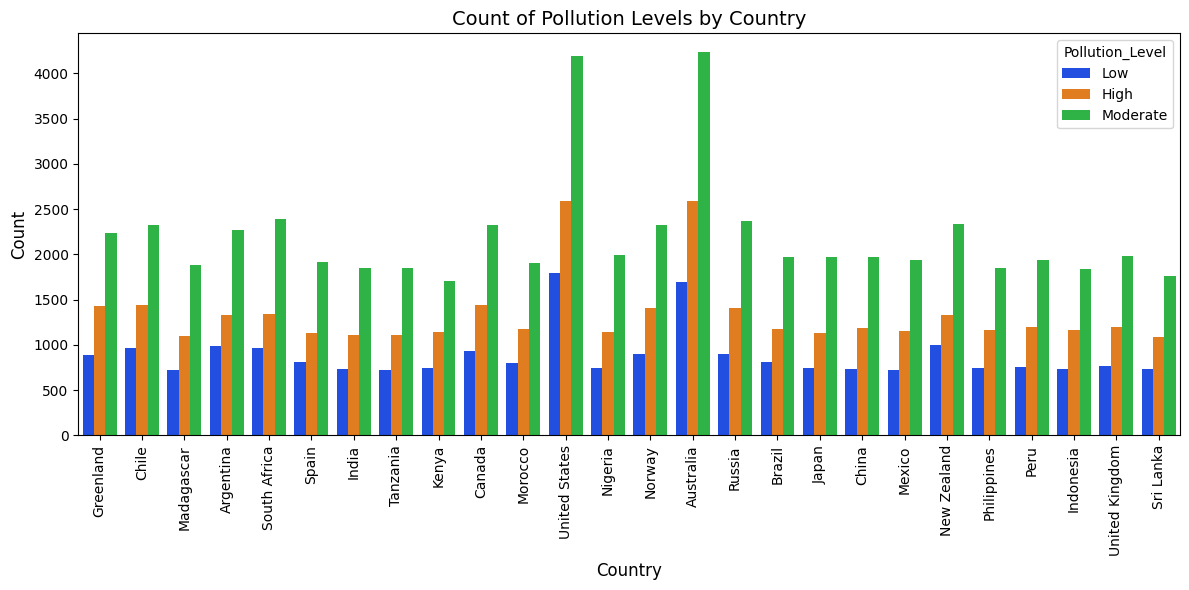

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Country', hue='Pollution_Level', palette='bright')
plt.title("Count of Pollution Levels by Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

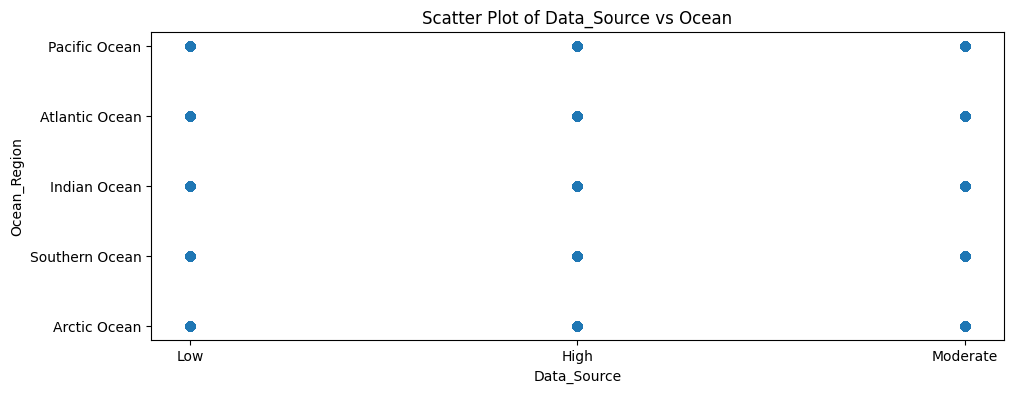

In [92]:
# Fill NaN in 'data_source' with a placeholder string for plotting
df['data_source'] = df['data_source'].fillna('Unknown')

# scatter plot
plt.figure(figsize=(11, 4))
plt.scatter(df['Pollution_Level'], df['Region'])
plt.title("Scatter Plot of Data_Source vs Ocean")
plt.xlabel("Data_Source")
plt.ylabel("Ocean_Region")
plt.show()

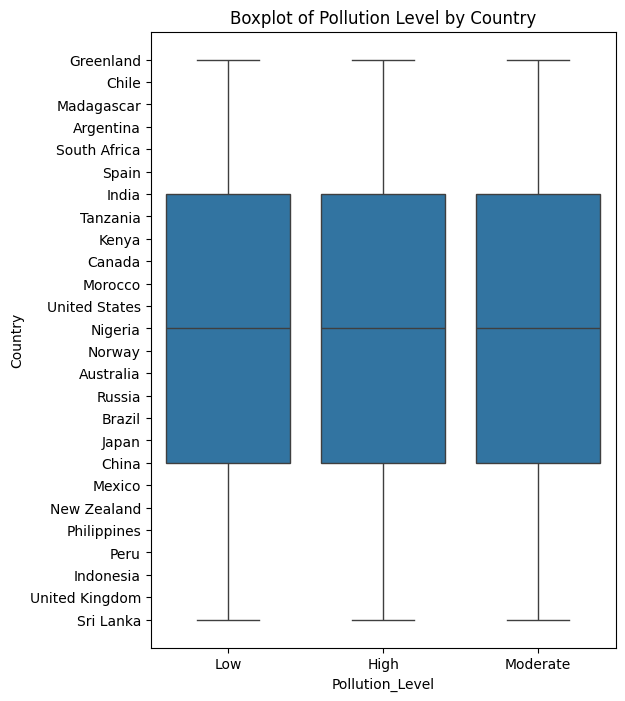

In [93]:
#BOXPLOT
plt.figure(figsize=(6, 8))
sns.boxplot(x='Pollution_Level', y='Country', data=df)
plt.xlabel('Pollution_Level')
plt.ylabel('Country')
plt.title('Boxplot of Pollution Level by Country')
plt.show()

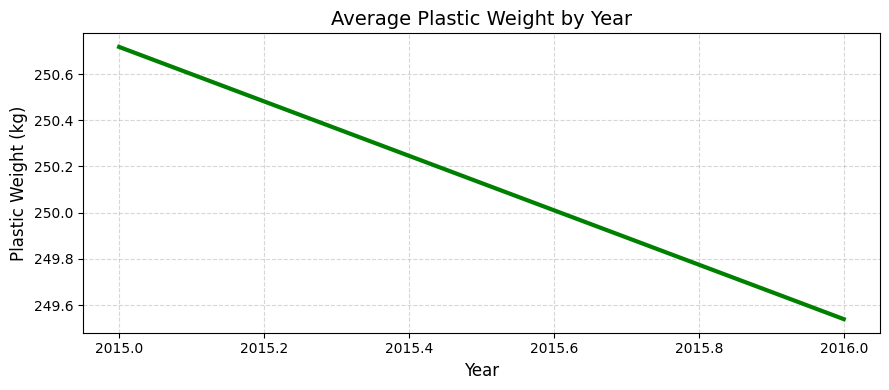

In [94]:
yearly_data = df.groupby('Year')['Plastic_Weight_kg'].mean().reset_index()

# ---- Create line plot ----
plt.figure(figsize=(9, 4))
plt.plot(yearly_data['Year'], yearly_data['Plastic_Weight_kg'],
         color='green', linewidth=3)

# ---- Styling ----
plt.title("Average Plastic Weight by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Plastic Weight (kg)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

FEATURE ENGINEERING

In [95]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Region_encoded'] = le.fit_transform(df['Region'])
df['data_Source_encoded'] = le.fit_transform(df['data_source'])
df['Country_encoded'] = le.fit_transform(df['Country'])
df['Pollution_Level_encoded'] = le.fit_transform(df['Pollution_Level'])

print(df.head())

   Unnamed: 0       Country          Region                      Plastic_Type  \
0           0     Greenland    Arctic Ocean  Polyethylene Terephthalate (PET)   
1           1         Chile  Southern Ocean                 Polyethylene (PE)   
2           2    Madagascar    Indian Ocean  Polyethylene Terephthalate (PET)   
3           3     Argentina  Southern Ocean  Polyethylene Terephthalate (PET)   
4           4  South Africa  Southern Ocean  Polyethylene Terephthalate (PET)   

    Latitude   Longitude  Plastic_Weight_kg Pollution_Level        Date  Year  \
0 -58.459627 -169.626456              41.93             Low  01/01/2015  2015   
1  49.449892   77.319852             403.38            High  01/01/2015  2015   
2  80.422411  130.332581             241.70        Moderate  01/01/2015  2015   
3 -71.920725   58.003563             482.76            High  01/01/2015  2015   
4 -61.993742 -169.011282              58.75             Low  01/01/2015  2015   

   Depth_meters data_sourc

In [96]:
df.head()

,Unnamed: 0,Country,Region,Plastic_Type,Latitude,Longitude,Plastic_Weight_kg,Pollution_Level,Date,Year,Depth_meters,data_source,Waste_Management_Efficiency,Nearby_Population,Region_encoded,data_Source_encoded,Country_encoded,Pollution_Level_encoded
0,0,Greenland,Arctic Ocean,Polyethylene Terephthalate (PET),-58.459627,-169.626456,41.93,Low,01/01/2015,2015,73.09,NGO,0.909422,13914,0,3,6,1
1,1,Chile,Southern Ocean,Polyethylene (PE),49.449892,77.319852,403.38,High,01/01/2015,2015,71.21,Satellite,0.094392,492,4,5,4,0
2,2,Madagascar,Indian Ocean,Polyethylene Terephthalate (PET),80.422411,130.332581,241.70,Moderate,01/01/2015,2015,19.53,Government,0.544576,6927,2,2,11,2
3,3,Argentina,Southern Ocean,Polyethylene Terephthalate (PET),-71.920725,58.003563,482.76,High,01/01/2015,2015,69.72,Research,0.052429,1230,4,4,0,0
4,4,South Africa,Southern Ocean,Polyethylene Terephthalate (PET),-61.993742,-169.011282,58.75,Low,01/01/2015,2015,58.14,NGO,0.956200,26329,4,3,20,1


In [97]:
df = df[['Country','Country_encoded', 'Region','Region_encoded','Plastic_Type', 'Latitude', 'Longitude','Plastic_Weight_kg','Pollution_Level',
         'Pollution_Level_encoded','Date','Year', 'Depth_meters', 'data_source','data_Source_encoded',
         'Waste_Management_Efficiency', 'Nearby_Population']]
df.head()

,Country,Country_encoded,Region,Region_encoded,Plastic_Type,Latitude,Longitude,Plastic_Weight_kg,Pollution_Level,Pollution_Level_encoded,Date,Year,Depth_meters,data_source,data_Source_encoded,Waste_Management_Efficiency,Nearby_Population
0,Greenland,6,Arctic Ocean,0,Polyethylene Terephthalate (PET),-58.459627,-169.626456,41.93,Low,1,01/01/2015,2015,73.09,NGO,3,0.909422,13914
1,Chile,4,Southern Ocean,4,Polyethylene (PE),49.449892,77.319852,403.38,High,0,01/01/2015,2015,71.21,Satellite,5,0.094392,492
2,Madagascar,11,Indian Ocean,2,Polyethylene Terephthalate (PET),80.422411,130.332581,241.70,Moderate,2,01/01/2015,2015,19.53,Government,2,0.544576,6927
3,Argentina,0,Southern Ocean,4,Polyethylene Terephthalate (PET),-71.920725,58.003563,482.76,High,0,01/01/2015,2015,69.72,Research,4,0.052429,1230
4,South Africa,20,Southern Ocean,4,Polyethylene Terephthalate (PET),-61.993742,-169.011282,58.75,Low,1,01/01/2015,2015,58.14,NGO,3,0.956200,26329


In [98]:
df.to_excel("Ocean_cleaned_data.xlsx", index=False)

MODEL TRAINING

In [99]:
x = df[['data_Source_encoded','Country_encoded','Region_encoded','Year','Pollution_Level_encoded','Waste_Management_Efficiency','Nearby_Population']]

y = df['Plastic_Weight_kg']

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

MODEL BUILDING

In [101]:
model = LinearRegression()

In [102]:
model.fit(x_train, y_train)

LinearRegression()

In [103]:
y_pred = model.predict(x_test)

MODEL EVALUATION

In [104]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.9694800673275926

In [105]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

632.7260509623644

In [106]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(y_test,y_pred)
rmse

25.154046413298286